<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:green"><center>Aplicaciones del Procesamiento de Lenguaje Natural</center></span>

<center>Prática II</center>
<br></br>

<figure>
<center>
<img src="../Imagenes/Ensayo.jpg" width="400" height="400" align="center"/>
</center>
</figure>

<center>Fuente: <a href="https://commons.wikimedia.org/wiki/File:Composition_IX.jpg">Wassily Kandinsky</a>, Public domain, via Wikimedia Commons</center>

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co
6. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

7. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

8. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

9. Dairo Moreno, damoralesj@unal.edu.co
10. Joan Castro, jocastroc@unal.edu.co
11. Bryan Riveros, briveros@unal.edu.co
12. Rosmer Vargas, rovargasc@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:blue">Referencias</span>

1. [Aprendizaje Profundo-Diplomado](https://github.com/AprendizajeProfundo/Diplomado)
1. [Aprendizaje Profundo-PLN](https://github.com/AprendizajeProfundo/PLN)
1. Varios, [Dive into deep learning](https://d2l.ai/), enero 2021

## <span style="color:blue">Contenido</span>

- [Obtención de Datos](#Obtención-de-Datos)

- [Pre-procesamiento](#Pre-procesamiento)

- [Análisis Descriptivo](#Análisis-Descriptivo)

- [Extracción de Variables](#Extracción-de-Variables)

- [Aprendizaje No Supervisado](#Aprendizaje-No-Supervisado)

- [Aprendizaje Supervisado](#Aprendizaje-Supervisado)

## <span style="color:blue">Obtención de Datos</span>

El conjunto completo de datos que usaremos para esta práctica son bastantes conocidos y se pueden encontrar aquí:

[The Hewlett Foundation: Automated Essay Scoring](https://www.kaggle.com/c/asap-aes/data)

Por algunos detalles técnicos, fue necesario hacer unos ajustes a los datos, por lo que usaremos los datos depurados a continuación:

In [5]:
# Librería para manejo de datos
import pandas as pd

# Datos de ensayos
datos = pd.read_excel("../Datos/training_set_rel3.xls",usecols=['essay_id', 'essay_set', 'essay','domain1_score'])

# Descripción de los datos
descripcion = pd.read_excel('../Datos/essay_set_descriptions.xlsx')

**Veamos los datos:**

In [6]:
datos

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0
...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35.0
12974,21628,8,I never understood the meaning laughter is th...,32.0
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40.0
12976,21630,8,Trippin' on fen...,40.0


Veamos una fila en específico

In [7]:
datos.iloc[[0]]

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8.0


Un ensayo en específico, sería

In [8]:
print(datos.iloc[0]['essay'])

Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy

**Veamos también, una descripción de los datos:**

In [9]:
descripcion

,essay_set,type_of_essay,grade_level,training_set_size,valid_set_size,test_set_size,min_domain1_score,max_domain1_score,min_domain2_score,max_domain2_score,has_domain1rater1,has_domain1rater2,has_domain1rater3,has_domain1_score,has_domain2rater1,has_domain2rater2,has_domain2_score
0,1,persuasive / narrative / expository,8,1783,589,594,2,12,NaN,NaN,1,1,0,1,0,0,0
1,2,persuasive / narrative / expository,10,1800,600,600,1,6,1.0,4.0,1,1,0,1,1,1,1
2,3,source dependent responses,10,1726,568,564,0,3,NaN,NaN,1,1,0,1,0,0,0
3,4,source dependent responses,10,1772,586,590,0,3,NaN,NaN,1,1,0,1,0,0,0
4,5,source dependent responses,8,1805,601,600,0,4,NaN,NaN,1,1,0,1,0,0,0
5,6,source dependent responses,10,1800,600,600,0,4,NaN,NaN,1,1,0,1,0,0,0
6,7,persuasive / narrative / expository,7,1569,441,454,0,30,NaN,NaN,1,1,0,1,0,0,0
7,8,persuasive / narrative / expository,10,723,233,252,0,60,NaN,NaN,1,1,1,1,0,0,0


¿Qué es un dominio?

[[Volver]](#Contenido)

## <span style="color:#4361EE">Pre-procesamiento</span>

In [10]:
# !pip install language_tool_python

In [11]:
# Importar librería de chequeo de lenguaje
import language_tool_python
import datetime

In [12]:
tool = language_tool_python.LanguageTool('en-US')

In [14]:
l = tool.check(datos['essay'][0])
c = language_tool_python.utils.correct(datos['essay'][0], l)

for cor in l:
    print(cor)
print("\nCuántos errores:",len(l))
print("\nEnsayo corregido:\n\n",c)

Offset 218, length 6, Rule ID: MORFOLOGIK_RULE_EN_US
Message: Possible spelling mistake found.
Suggestion: trouble; treble
...he globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How wo...
                                           ^^^^^^
Offset 239, length 4, Rule ID: EN_CONTRACTION_SPELLING
Message: Possible spelling mistake found
Suggestion: Don't
...nd keeps us out of troble! Thing about! Dont you think so? How would you feel if you...
                                           ^^^^
Offset 377, length 8, Rule ID: MORFOLOGIK_RULE_EN_US
Message: Possible spelling mistake found.
Suggestion: business
... ever time to chat with your friends or buisness partner about things. Well now - there'...
                                           ^^^^^^^^
Offset 406, length 1, Rule ID: QUESTION_MARK
Message: If this is a question, use a question mark.
Suggestion: ?
...friends or buisness partner about things. Well now - there's a new way to chat th...
                  

In [15]:
t0 = datetime.datetime.now()

datos['matches'] = datos['essay'].apply(lambda txt: tool.check(txt))
datos['corrections'] = datos.apply(lambda l: len(l['matches']), axis=1)
datos['corrected'] = datos.apply(lambda l: language_tool_python.utils.correct(l['essay'], l['matches']), axis=1)

t1 = datetime.datetime.now()
print('Processing time: {}'.format(t1 - t0))


datos.to_pickle('training_corr.pkl')

In [ ]:
datos = pd.read_pickle('training_corr.pkl')

In [ ]:
!python -m spacy download 'en_core_web_lg'

2021-09-09 23:02:24.011791: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-09 23:02:24.011866: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
     |████████████████████████████████| 777.1 MB 3.4 kB/s eta 0:00:015   |██                              | 47.6 MB 4.8 MB/s eta 0:02:32     |████████▊                       | 210.5 MB 2.8 MB/s eta 0:03:20     |██████████████████████▊         | 550.8 MB 4.2 MB/s eta 0:00:54     |████████████████████████        | 585.2 MB 2.9 MB/s eta 0:01:07     |██████████████████████████████▍ | 737.2 MB 761 kB/s eta 0:00:53
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
sents = []
tokens = []
lemma = []
pos = []
ner = []

import spacy
import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = set(STOP_WORDS)
# stop_words.update(punctuation) # remove it if you need punctuation 

nlp = spacy.load('en_core_web_lg')

t0 = datetime.datetime.now()

# suppress numpy warnings
np.warnings.filterwarnings('ignore')

for essay in nlp.pipe(datos['corrected'], batch_size=100, n_process=4):
    if essay.is_parsed:
        tokens.append([e.text for e in essay])
        sents.append([sent.text.strip() for sent in essay.sents])
        pos.append([e.pos_ for e in essay])
        ner.append([e.text for e in essay.ents])
        lemma.append([n.lemma_ for n in essay])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)
        sents.append(None)
        ner.append(None)

datos['tokens'] = tokens
datos['lemma'] = lemma
datos['pos'] = pos
datos['sents'] = sents
datos['ner'] = ner

t1 = datetime.datetime.now()
print('Processing time: {}'.format(t1 - t0))

2021-09-09 23:06:24.069687: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-09 23:06:24.069718: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Processing time: 3:39:54.726632


In [ ]:
datos.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait5,rater3_trait6,matches,corrections,corrected,tokens,lemma,pos,sents,ner
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,"[Offset 218, length 6, Rule ID: MORFOLOGIK_RUL...",17,"Dear local newspaper, I think effects computer...","[Dear, local, newspaper, ,, I, think, effects,...","[dear, local, newspaper, ,, I, think, effect, ...","[ADJ, ADJ, NOUN, PUNCT, PRON, VERB, NOUN, NOUN...","[Dear local newspaper, I think effects compute...","[@ORGANIZATION2, @CAPS1, Facebook, MySpace]"
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,"[Offset 148, length 8, Rule ID: MORFOLOGIK_RUL...",25,"Dear @CAPS1 @CAPS2, I believe that using compu...","[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...","[dear, @CAPS1, @caps2, ,, I, believe, that, us...","[ADJ, PUNCT, ADJ, PUNCT, PRON, VERB, SCONJ, VE...","[Dear @CAPS1, @CAPS2, I believe that using com...","[Facebook and MySpace, millions, one, MySpace,..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,"[Offset 315, length 4, Rule ID: MORFOLOGIK_RUL...",17,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[INTJ, PUNCT, PUNCT, PROPN, PROPN, ADJ, CCONJ,...","[Dear, @CAPS1 @CAPS2 @CAPS3, More and more peo...","[today, one, one, @CAPS5, @ORGANIZATION1]"
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,"[Offset 86, length 7, Rule ID: MORFOLOGIK_RULE...",30,"Dear Local Newspaper, @CAPS1 I have found that...","[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...","[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...","[PROPN, PROPN, PROPN, PUNCT, PUNCT, PRON, AUX,...","[Dear Local Newspaper, @CAPS1, I have found th...","[Dear Local Newspaper, @CAPS1, @PERSON1, @PERS..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,"[Offset 177, length 8, Rule ID: MORFOLOGIK_RUL...",17,"Dear @LOCATION1, I know having computers has a...","[Dear, @LOCATION1, ,, I, know, having, compute...","[dear, @LOCATION1, ,, I, know, have, computer,...","[INTJ, PROPN, PUNCT, PRON, VERB, VERB, NOUN, V...","[Dear @LOCATION1, I know having computers has ...","[First, one, Secondly, @LOCATION2, one, only o..."


In [ ]:
t0 = datetime.datetime.now()

datos['token_count'] = datos.apply(lambda x: len(x['tokens']), axis=1)
datos['unique_token_count'] = datos.apply(lambda x: len(set(x['tokens'])), axis=1)
datos['nostop_count'] = datos.apply(lambda x: len([token for token in x['tokens'] if token not in stop_words]), axis=1)
datos['sent_count'] = datos.apply(lambda x: len(x['sents']), axis=1)
datos['ner_count'] = datos.apply(lambda x: len(x['ner']), axis=1)
datos['comma'] = datos.apply(lambda x: x['corrected'].count(','), axis=1)
datos['question'] = datos.apply(lambda x: x['corrected'].count('?'), axis=1)
datos['exclamation'] = datos.apply(lambda x: x['corrected'].count('!'), axis=1)
datos['quotation'] = datos.apply(lambda x: x['corrected'].count('"') + x['corrected'].count("'"), axis=1)
datos['organization'] = datos.apply(lambda x: x['corrected'].count(r'@ORGANIZATION'), axis=1)
datos['caps'] = datos.apply(lambda x: x['corrected'].count(r'@CAPS'), axis=1)
datos['person'] = datos.apply(lambda x: x['corrected'].count(r'@PERSON'), axis=1)
datos['location'] = datos.apply(lambda x: x['corrected'].count(r'@LOCATION'), axis=1)
datos['money'] = datos.apply(lambda x: x['corrected'].count(r'@MONEY'), axis=1)
datos['time'] = datos.apply(lambda x: x['corrected'].count(r'@TIME'), axis=1)
datos['date'] = datos.apply(lambda x: x['corrected'].count(r'@DATE'), axis=1)
datos['percent'] = datos.apply(lambda x: x['corrected'].count(r'@PERCENT'), axis=1)
datos['noun'] = datos.apply(lambda x: x['pos'].count('NOUN'), axis=1)
datos['adj'] = datos.apply(lambda x: x['pos'].count('ADJ'), axis=1)
datos['pron'] = datos.apply(lambda x: x['pos'].count('PRON'), axis=1)
datos['verb'] = datos.apply(lambda x: x['pos'].count('VERB'), axis=1)
datos['noun'] = datos.apply(lambda x: x['pos'].count('NOUN'), axis=1)
datos['cconj'] = datos.apply(lambda x: x['pos'].count('CCONJ'), axis=1)
datos['adv'] = datos.apply(lambda x: x['pos'].count('ADV'), axis=1)
datos['det'] = datos.apply(lambda x: x['pos'].count('DET'), axis=1)
datos['propn'] = datos.apply(lambda x: x['pos'].count('PROPN'), axis=1)
datos['num'] = datos.apply(lambda x: x['pos'].count('NUM'), axis=1)
datos['part'] = datos.apply(lambda x: x['pos'].count('PART'), axis=1)
datos['intj'] = datos.apply(lambda x: x['pos'].count('INTJ'), axis=1)

t1 = datetime.datetime.now()
print('Processing time: {}'.format(t1 - t0))
datos.to_pickle('training_features.pkl')

Processing time: 0:00:24.543975


In [ ]:
datos

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,18,48,59,14,19,21,5,0,16,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,22,44,74,19,27,37,9,4,10,0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,16,22,47,16,14,30,3,3,10,1
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,38,29,82,17,30,46,36,0,23,0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,25,34,75,16,40,56,3,4,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,57,134,145,55,74,70,17,14,23,3
12974,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,35,76,77,27,60,53,18,5,17,3
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,41,84,126,39,57,96,39,5,21,2
12976,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,43,95,79,22,60,51,13,4,10,1


In [ ]:
datos['tokens']

0        [Dear, local, newspaper, ,, I, think, effects,...
1        [Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...
2        [Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...
3        [Dear, Local, Newspaper, ,, @CAPS1, I, have, f...
4        [Dear, @LOCATION1, ,, I, know, having, compute...
                               ...                        
12973    [ , In, most, stories, mothers, and, daughters...
12974    [ , I, never, understood, the, meaning, laught...
12975    [When, you, laugh, ,, is, @CAPS5, out, of, hab...
12976    [ , Tripping, ', on, fences, I, am, @NUM1, yea...
12977    [ , Many, people, believe, that, laughter, can...
Name: tokens, Length: 12978, dtype: object

In [ ]:
datos['lemma']

0        [dear, local, newspaper, ,, I, think, effect, ...
1        [dear, @CAPS1, @caps2, ,, I, believe, that, us...
2        [dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...
3        [Dear, Local, Newspaper, ,, @CAPS1, I, have, f...
4        [dear, @LOCATION1, ,, I, know, have, computer,...
                               ...                        
12973    [ , in, most, story, mother, and, daughter, be...
12974    [ , I, never, understand, the, meaning, laught...
12975    [when, you, laugh, ,, be, @CAPS5, out, of, hab...
12976    [ , Tripping, ', on, fence, I, be, @num1, year...
12977    [ , many, people, believe, that, laughter, can...
Name: lemma, Length: 12978, dtype: object

In [ ]:
datos['ner']

0              [@ORGANIZATION2, @CAPS1, Facebook, MySpace]
1        [Facebook and MySpace, millions, one, MySpace,...
2                [today, one, one, @CAPS5, @ORGANIZATION1]
3        [Dear Local Newspaper, @CAPS1, @PERSON1, @PERS...
4        [First, one, Secondly, @LOCATION2, one, only o...
                               ...                        
12973    [one, sixteen, forty, Approximately seven mont...
12974    [two, this day, about an hour, a half an hour,...
12975    [@CAPS1, @CAPS1, one, two, @LOCATION2, @PERSON...
12976    [years, two, @ORGANIZATION2, @ORGANIZATION1, @...
12977    [daily, @ORGANIZATION1, @CAPS1, @CAPS1, @ORGAN...
Name: ner, Length: 12978, dtype: object

## <span style="color:#4361EE">Análisis Descriptivo</span>

### <span style="color:#4CC9F0">Sube datos preprocesados</span>

In [ ]:
import pandas as pd

datos= pd.read_pickle('../Datos/Ensayos/data_training_st_features.pkl')


### <span style="color:#4CC9F0">Selecciona columnas de interés, renombra columna de ensayos y divide el target_score entre 10</span>

In [ ]:
column_names = ['essay_id', 'topic','corrected', 'target_score', 'tokens',
                'corrections', 'similarity', 'token_count', 'unique_token_count',
       'nostop_count', 'sent_count', 'ner_count', 'comma', 'question',
       'exclamation', 'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent', 'noun', 'adj', 'pron',
       'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'part', 'intj']

In [ ]:
datos = datos[column_names]
datos.rename(columns={'corrected': 'essay_text' }, inplace=True)
datos['target_score'] = datos['target_score']/10

In [ ]:
datos

,essay_id,topic,essay_text,target_score,tokens,corrections,similarity,token_count,unique_token_count,nostop_count,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,1,1,"Dear local newspaper, I think effects computer...",0.8,"[Dear, local, newspaper, ,, I, think, effects,...",15,0.973035,395,180,206,...,19,48,56,14,19,20,6,0,16,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.9,"[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",23,0.979935,456,210,238,...,23,42,73,19,26,37,5,5,10,0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.7,"[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",16,0.989641,306,160,155,...,18,22,47,16,14,28,3,3,10,1
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",1.0,"[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...",32,0.981397,576,266,330,...,40,28,81,17,28,45,37,0,23,0
4,5,1,"Dear @LOCATION1, I know having computers has a...",0.8,"[Dear, @LOCATION1, ,, I, know, having, compute...",19,0.978967,518,213,252,...,28,34,73,16,39,57,4,4,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,3.5,"[ , In, most, stories, mothers, and, daughters...",28,0.954823,953,349,450,...,56,135,142,55,74,69,17,14,24,3
12974,21628,8,I never understood the meaning laughter is th...,3.2,"[ , I, never, understood, the, meaning, laught...",47,0.955488,635,226,314,...,37,76,79,25,58,53,18,4,17,3
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",4.0,"[When, you, laugh, ,, is, @CAPS5, out, of, hab...",24,0.959167,955,380,513,...,41,85,126,39,58,96,38,5,21,2
12976,21630,8,"Tripping' on fences I am @NUM1 years young, a...",4.0,"[ , Trippin, ', ...",13,0.942394,666,258,355,...,43,95,79,22,59,50,13,4,10,1


### <span style="color:#4CC9F0">Seleciona predictores</span>

In [ ]:
predictors = [  'corrections',
                'unique_token_count',
                'sent_count',
                'ner_count',
                'comma',
                'question',
                'exclamation',
                'quotation',
                'organization',
                'caps',
                'person',
                'location',
                'money',
                'time',
                'date',
                'percent',
                'noun',
                'adj',
                'pron',
                'verb',
                'cconj',
                'adv',
                'det',
                'propn',
                'num',
                'part',
                'intj'
                ]

### <span style="color:#4CC9F0">Distribución de target_score y summary de features</span>

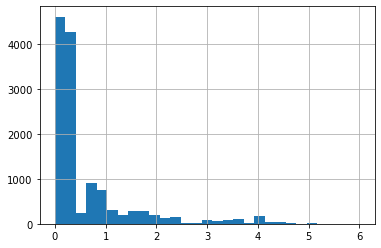

In [ ]:
import matplotlib.pyplot as plt
datos['target_score'].hist(bins=29)
plt.show()

In [ ]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
essay_id,12978.0,10295.432809,6308.588616,1.000000,4439.250000,10045.500000,15680.750000,21633.000000
topic,12978.0,4.179458,2.136749,1.000000,2.000000,4.000000,6.000000,8.000000
target_score,12978.0,0.679928,0.897036,0.000000,0.200000,0.300000,0.800000,6.000000
corrections,12978.0,11.114656,10.600486,0.000000,4.000000,8.000000,15.000000,130.000000
similarity,12978.0,0.965983,0.022251,0.622369,0.956031,0.973819,0.981688,0.995209
token_count,12978.0,251.052705,199.007198,2.000000,110.000000,184.000000,347.000000,1249.000000
unique_token_count,12978.0,119.081368,71.050260,2.000000,67.000000,102.000000,155.000000,505.000000
nostop_count,12978.0,129.884343,102.121770,2.000000,57.000000,99.000000,176.000000,740.000000
sent_count,12978.0,14.253968,12.387918,1.000000,6.000000,10.000000,20.000000,133.000000
ner_count,12978.0,4.905070,5.241763,0.000000,1.000000,4.000000,7.000000,58.000000


### <span style="color:#4CC9F0">Crea archivo pickel</span>

In [ ]:
datos.to_pickle('../Datos/Ensayos/data2bert.pkl')

## <span style="color:blue">Matriz de Correlación</span>

In [ ]:
datos = pd.read_pickle('../Datos/Ensayos/data2bert.pkl')

In [ ]:
datos.columns

Index(['essay_id', 'topic', 'essay_text', 'target_score', 'tokens',
       'corrections', 'similarity', 'token_count', 'unique_token_count',
       'nostop_count', 'sent_count', 'ner_count', 'comma', 'question',
       'exclamation', 'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent', 'noun', 'adj', 'pron',
       'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'part', 'intj'],
      dtype='object')

In [ ]:

# selcciona variables

var_names = ['target_score', 
        'corrections', 'similarity', 'token_count',
       'unique_token_count', 'nostop_count', 'sent_count',
       'ner_count', 'comma', 'question', 'exclamation',
       'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent',
       'noun', 'adj', 'pron', 'verb', 'cconj', 'adv',
       'det', 'propn', 'num', 'part', 'intj']

variable = datos[var_names]
    

In [ ]:
variable.shape

(12978, 31)

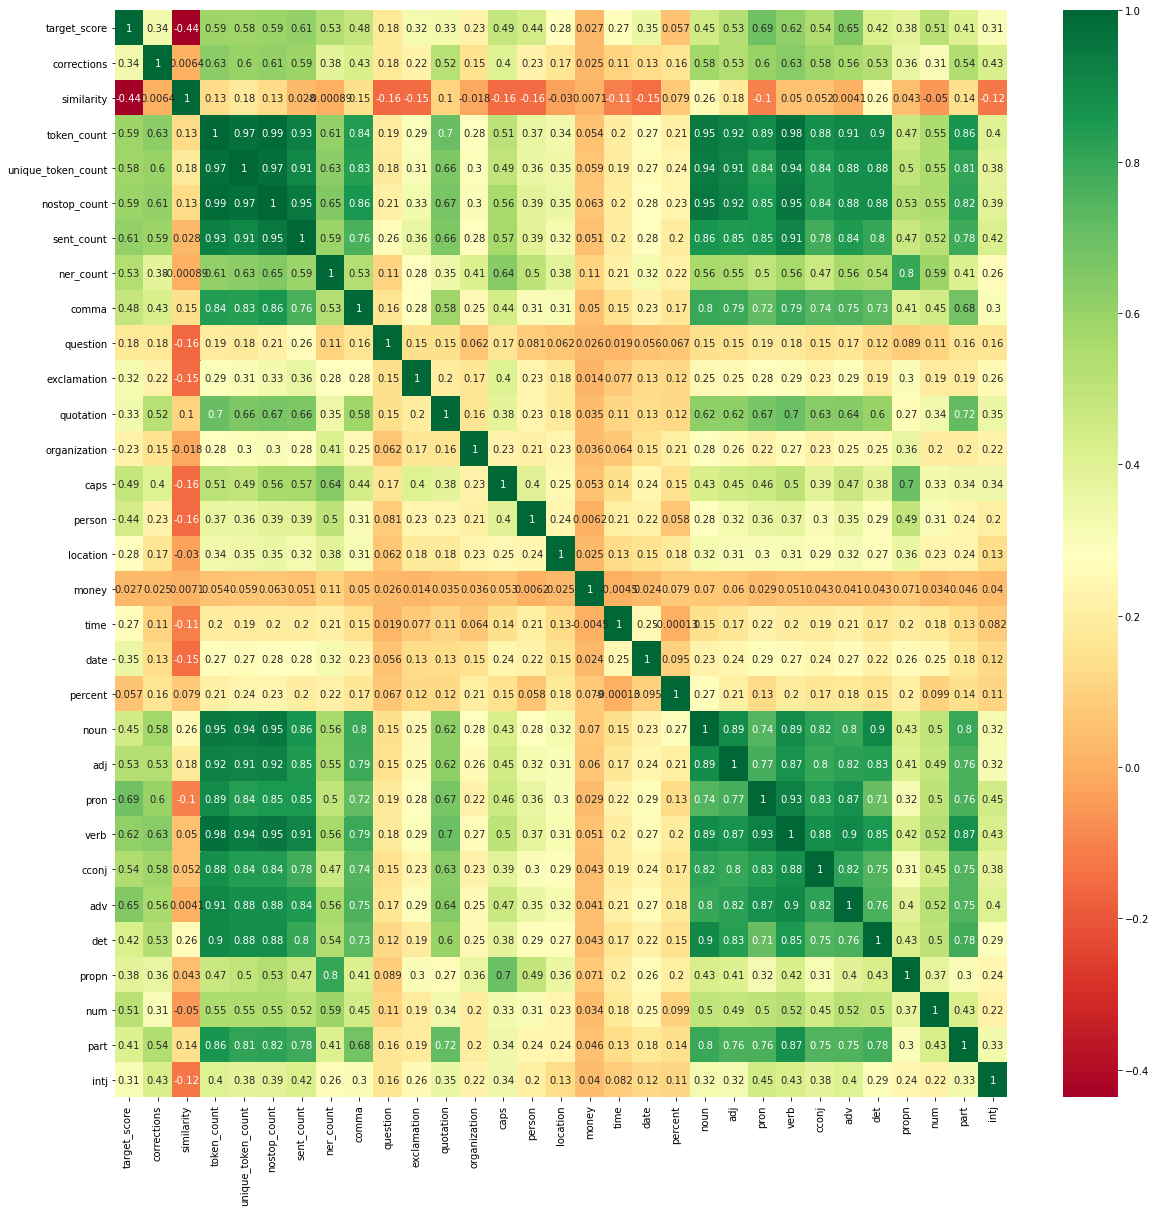

In [ ]:
import seaborn as sns

corrmat = variable.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(variable[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
pd.options.display.max_rows = 100
corrmat[['target_score']].sort_values(by='target_score',ascending=False)

,target_score
target_score,1.000000
pron,0.688836
adv,0.651870
verb,0.615194
sent_count,0.612585
nostop_count,0.591806
token_count,0.588550
unique_token_count,0.583458
cconj,0.541954
ner_count,0.532799


### <span style="color:#4CC9F0">Estadisticas para seleccionar features</span>

### <span style="color:#4CC9F0">Información mutua</span>

In [ ]:
from sklearn.feature_selection import  SelectKBest, f_regression, mutual_info_regression

X = datos[predictors]
y = datos['target_score']
best_features= SelectKBest(score_func=mutual_info_regression,k=len(predictors))
fit=best_features.fit(X,y)

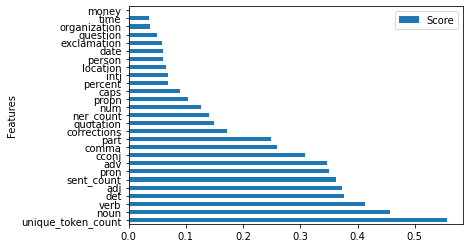

In [ ]:
df_score=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,df_score],axis=1)
featureScores.columns=['Features','Score']
featureScores=featureScores.set_index('Features')
featureScores.nlargest(len(predictors),'Score').plot(kind='barh')
plt.show()

### <span style="color:#4CC9F0">Regresión</span>

In [ ]:
best_features= SelectKBest(score_func=f_regression,k=len(predictors))
fit=best_features.fit(X,y)

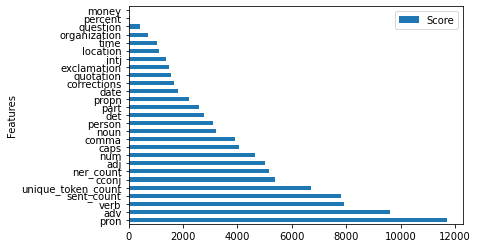

In [ ]:
df_score=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,df_score],axis=1)
featureScores.columns=['Features','Score']
featureScores=featureScores.set_index('Features')
featureScores.nlargest(len(predictors),'Score').plot(kind='barh')
plt.show()

#### Guarda los textos de los ensayos corregido para el embedding

In [ ]:
datos['essay_text'].to_csv('../Datos/Ensayos/ensayos.csv')

[[Volver]](#Contenido)

## <span style="color:#4361EE">Aprendizaje No Supervisado </span>

### <span style="color:#4CC9F0">Sumergimiento de los textos por palabra</span>

In [ ]:
# fasttext para generar Embeddings
import fasttext

### <span style="color:#4CC9F0">Crea el modelo de sumergimiento</span>

In [ ]:
ft_model = fasttext.train_unsupervised('../Datos/Ensayos/ensayos.csv',dim=300)

##  <span style="color:#4361EE">Embedding de Palabras</span>

In [ ]:
import numpy as np

In [ ]:
no_doc = np.random.randint(len(datos))

In [ ]:
# Volcabulario del embedding
vocabulary = set(ft_model.words)

def doc_word_vectors(words, model, vocabulary, num_features):
    
    nwords = 0.
    no_found=[]
    doc=[]
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            doc.append(model.get_word_vector(word))
        else:
            no_found.append(word)
    
    
        
    return np.array(doc),no_found

emb0,no_found = doc_word_vectors(datos['tokens'].iloc[no_doc], model=ft_model, vocabulary=vocabulary, num_features=ft_model.dim)

print('Dimensión del Embedding:',emb0.shape)
print('\nPalabras no encontradas:\n\n',no_found)

Dimensión del Embedding: (126, 300)

Palabras no encontradas:

 ['makeing', 'flamible', 'obsticle']


## <span style="color:#4361EE">Embedding de Textos</span>

### <span style="color:#4CC9F0">Promediar Palabras para Perfilar Ensayos </span>

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.get_word_vector(word))
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.words)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
ftext_feature_array = averaged_word_vectorizer(corpus=datos['tokens'], model=ft_model, num_features=ft_model.dim)

In [ ]:
doc_embedding = pd.DataFrame(ftext_feature_array)
doc_embedding

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.134276,-0.064131,-0.203344,-0.030151,0.040111,0.145260,-0.101368,-0.012593,-0.032670,0.108168,...,-0.144870,-0.145255,0.145434,0.136225,-0.009014,-0.080278,-0.041781,-0.031611,-0.020657,0.100653
1,-0.147792,-0.054068,-0.208092,-0.020247,0.058164,0.164993,-0.123446,-0.045614,-0.023216,0.098593,...,-0.116557,-0.101918,0.136425,0.139821,0.027870,-0.037178,-0.030455,-0.014172,-0.023276,0.087490
2,-0.162725,-0.070710,-0.234945,-0.051971,0.069461,0.165659,-0.123119,-0.069889,-0.074690,0.130028,...,-0.115945,-0.101869,0.172404,0.127285,-0.004383,-0.058549,-0.024826,-0.041188,-0.041705,0.114225
3,-0.140655,-0.066135,-0.206973,-0.041915,0.048141,0.177473,-0.110381,-0.043059,-0.028374,0.119578,...,-0.107149,-0.093143,0.149249,0.147888,0.000796,-0.042721,-0.002731,-0.028933,-0.046156,0.082511
4,-0.150969,-0.083469,-0.208581,-0.039027,0.054728,0.177736,-0.133557,-0.036243,-0.049799,0.118103,...,-0.118250,-0.124038,0.132092,0.137708,0.014891,-0.059917,-0.030523,-0.013634,-0.001344,0.078147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,-0.139110,-0.077281,-0.213818,-0.011500,0.059958,0.156127,-0.120783,0.004550,-0.036014,0.092854,...,-0.047728,-0.083366,0.130650,0.129506,0.006148,-0.022952,-0.067542,0.000395,-0.070913,0.053382
12974,-0.145930,-0.079537,-0.195362,-0.001226,0.067940,0.126856,-0.135155,-0.010318,-0.019352,0.069839,...,-0.066038,-0.095420,0.122467,0.145113,0.031238,-0.034937,-0.108001,0.012400,-0.065976,0.058821
12975,-0.139951,-0.090990,-0.192339,-0.019373,0.061235,0.171053,-0.117083,0.001641,-0.041339,0.077918,...,-0.048877,-0.080973,0.122421,0.136537,-0.002838,-0.014957,-0.095449,-0.003224,-0.040702,0.052954
12976,-0.139579,-0.073543,-0.208965,-0.003995,0.058935,0.148765,-0.108328,0.041651,-0.028309,0.080124,...,-0.051497,-0.094730,0.130091,0.196058,0.004729,-0.003022,-0.133983,0.006020,-0.058116,0.054341


In [ ]:
doc_embedding.to_csv('../Datos/Ensayos/Doc_Embedding_300.csv')

In [ ]:
doc_embedding = pd.read_csv('../Datos/Ensayos/Doc_Embedding_300.csv',index_col=0)
doc_embedding

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.134276,-0.064131,-0.203344,-0.030151,0.040111,0.145260,-0.101368,-0.012593,-0.032670,0.108168,...,-0.144870,-0.145255,0.145434,0.136225,-0.009014,-0.080278,-0.041781,-0.031611,-0.020657,0.100653
1,-0.147792,-0.054068,-0.208092,-0.020247,0.058164,0.164993,-0.123446,-0.045614,-0.023216,0.098593,...,-0.116557,-0.101918,0.136425,0.139821,0.027870,-0.037178,-0.030455,-0.014172,-0.023276,0.087490
2,-0.162725,-0.070710,-0.234945,-0.051971,0.069461,0.165659,-0.123119,-0.069889,-0.074690,0.130028,...,-0.115945,-0.101869,0.172404,0.127285,-0.004383,-0.058549,-0.024826,-0.041188,-0.041705,0.114225
3,-0.140655,-0.066135,-0.206973,-0.041915,0.048141,0.177473,-0.110381,-0.043059,-0.028374,0.119578,...,-0.107149,-0.093143,0.149249,0.147888,0.000796,-0.042721,-0.002731,-0.028933,-0.046156,0.082511
4,-0.150969,-0.083469,-0.208581,-0.039027,0.054728,0.177736,-0.133557,-0.036243,-0.049799,0.118103,...,-0.118250,-0.124038,0.132092,0.137708,0.014891,-0.059917,-0.030523,-0.013634,-0.001344,0.078147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,-0.139110,-0.077281,-0.213818,-0.011500,0.059958,0.156127,-0.120783,0.004550,-0.036014,0.092854,...,-0.047728,-0.083366,0.130650,0.129506,0.006148,-0.022952,-0.067542,0.000395,-0.070913,0.053382
12974,-0.145930,-0.079537,-0.195362,-0.001226,0.067940,0.126856,-0.135155,-0.010318,-0.019352,0.069839,...,-0.066038,-0.095420,0.122467,0.145113,0.031238,-0.034937,-0.108001,0.012400,-0.065976,0.058821
12975,-0.139951,-0.090990,-0.192339,-0.019373,0.061235,0.171053,-0.117083,0.001641,-0.041339,0.077918,...,-0.048877,-0.080973,0.122421,0.136537,-0.002838,-0.014957,-0.095449,-0.003224,-0.040702,0.052954
12976,-0.139579,-0.073543,-0.208965,-0.003995,0.058935,0.148765,-0.108328,0.041651,-0.028309,0.080124,...,-0.051497,-0.094730,0.130091,0.196058,0.004729,-0.003022,-0.133983,0.006020,-0.058116,0.054341


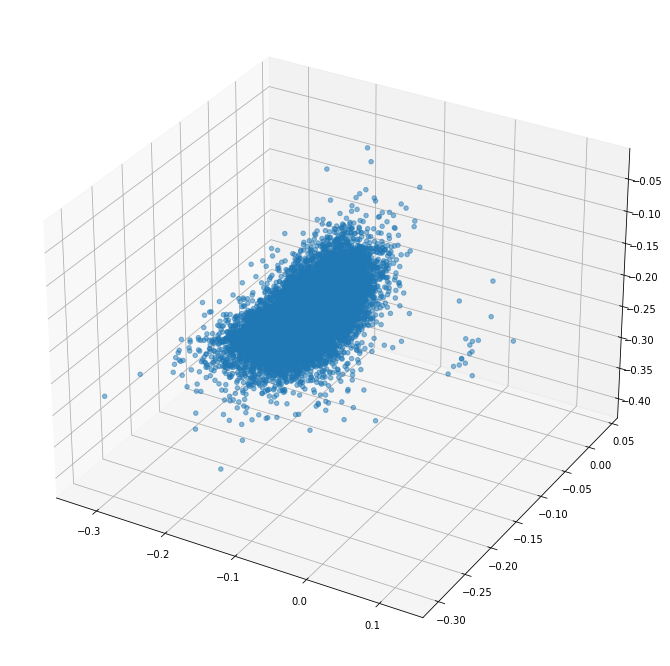

In [ ]:
%matplotlib inline
#%matplotlib qt
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(doc_embedding.iloc[:,0],doc_embedding.iloc[:,1],doc_embedding.iloc[:,2],alpha=0.5)
plt.show()

## <span style="color:#4361EE">Reducción de Dimensión</span>

### <span style="color:#4CC9F0">PCA </span>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40, random_state=0)
pcs = pca.fit_transform(doc_embedding.values)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.30850059 0.45327589 0.55178635 0.62346212 0.68171314 0.72454485
 0.75036299 0.76431691 0.77626109 0.78726392 0.79667685 0.80514791
 0.81267104 0.81999793 0.82644738 0.83231225 0.83774173 0.84251229
 0.84719997 0.85156917 0.8558201  0.85999298 0.86393326 0.86771836
 0.87132803 0.87479118 0.87809426 0.88113096 0.88394941 0.88669262
 0.88931366 0.89189867 0.89438081 0.89678244 0.89913968 0.90138011
 0.90356473 0.90565258 0.90768323 0.90962094]


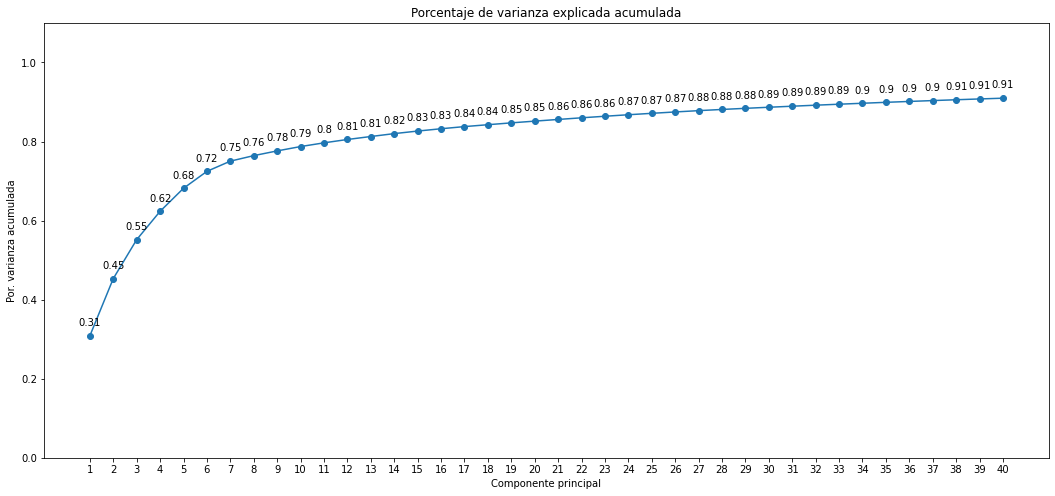

In [ ]:
%matplotlib inline

# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
ax.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

#ax.axvline(x=11, linestyle = '--')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

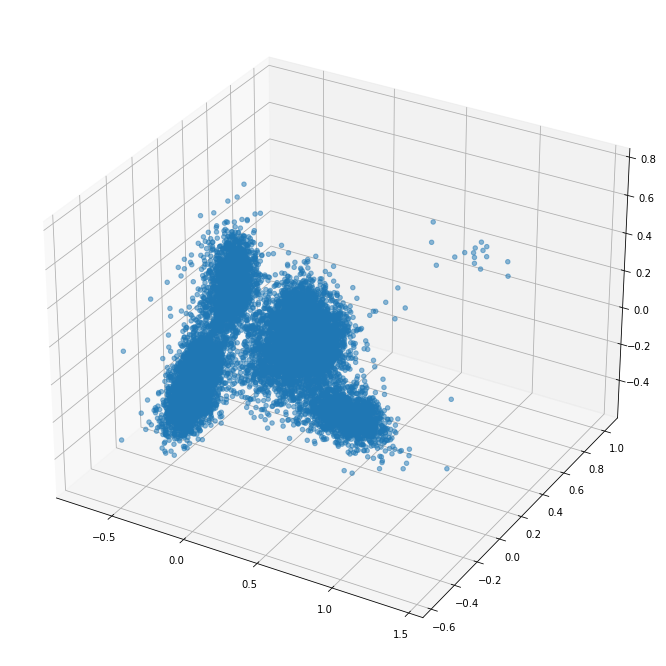

In [ ]:
%matplotlib inline
#%matplotlib qt
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(pcs[:,0],pcs[:,1],pcs[:,2],alpha=0.5)
plt.show()

## <span style="color:#4361EE">Clustering</span>

### <span style="color:#4CC9F0">K-Means </span>

In [ ]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_pcs = scaler.fit_transform(pcs)

In [ ]:
n_max = 80

kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

sse = []

for k in range(1, n_max):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_pcs)
    sse.append(kmeans.inertia_)

### <span style="color:#4CC9F0">Elbow </span>

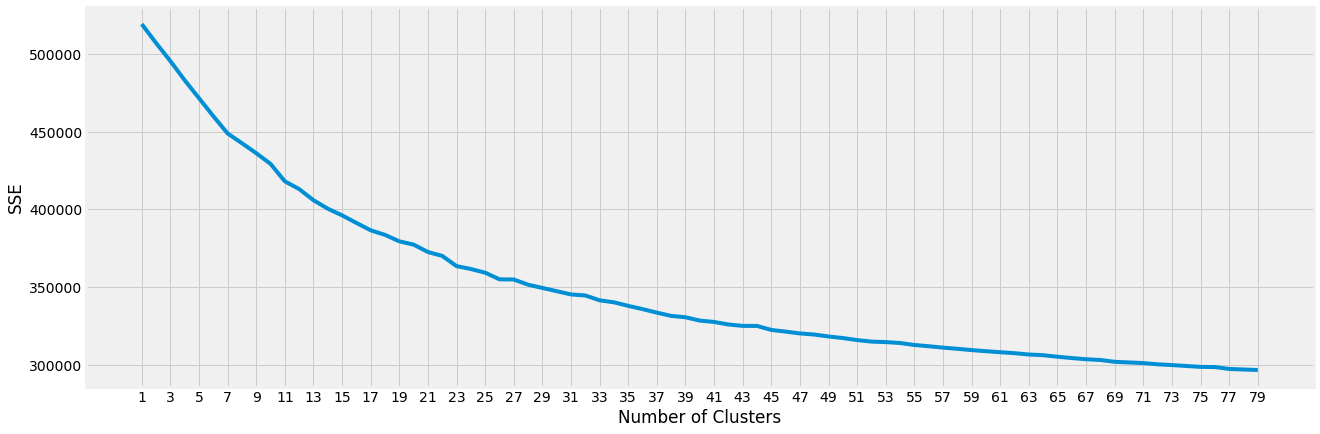

In [ ]:
%matplotlib inline
plt.figure(figsize=(22, 7))
plt.style.use("fivethirtyeight")
plt.plot(range(1, n_max), sse)
plt.xticks(range(1, n_max,2))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### <span style="color:#4CC9F0">Número Optimo de Clusters </span>

In [ ]:
kl = KneeLocator(range(1, n_max), sse, curve="convex", direction="decreasing")

kl.elbow

31

### <span style="color:#4CC9F0">Silhouette Coefficients</span>

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, n_max):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_pcs)
    score = silhouette_score(scaled_pcs, kmeans.labels_)
    silhouette_coefficients.append(score)

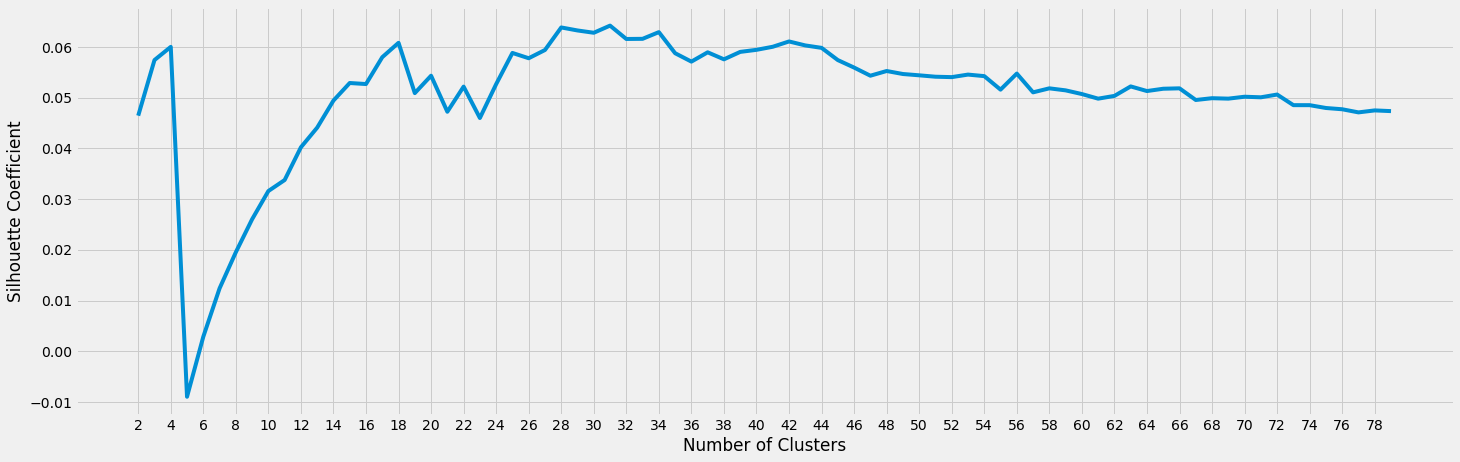

In [ ]:
plt.figure(figsize=(22, 7))
plt.style.use("fivethirtyeight")
plt.plot(range(2, n_max), silhouette_coefficients)
plt.xticks(range(2, n_max,2))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8, random_state=0)
km.fit_transform(scaled_pcs)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['Grupo'])

In [ ]:
datos.columns

Index(['essay_id', 'topic', 'essay_text', 'target_score', 'tokens',
       'corrections', 'similarity', 'token_count', 'unique_token_count',
       'nostop_count', 'sent_count', 'ner_count', 'comma', 'question',
       'exclamation', 'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent', 'noun', 'adj', 'pron',
       'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'part', 'intj'],
      dtype='object')

In [ ]:
data_final = pd.DataFrame([datos['essay_text'].values, ftext_feature_array,pcs,cluster_labels['Grupo']]).T
data_final.columns = ['essay','Embedding_300','PCA_40','Grupo']
data_final

,essay,Embedding_300,PCA_40,Grupo
0,"Dear local newspaper, I think effects computer...","[-0.13427573738959256, -0.06413086538231774, -...","[-0.358483817117281, -0.16749294193979145, -0....",2
1,"Dear @CAPS1 @CAPS2, I believe that using compu...","[-0.14779190605427794, -0.05406827885522045, -...","[-0.29317480539505936, -0.1347765638293927, -0...",2
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[-0.16272540874087024, -0.07071040460731318, -...","[-0.2527635841508947, -0.24368099570758983, -0...",2
3,"Dear Local Newspaper, @CAPS1 I have found that...","[-0.14065471931696974, -0.06613521803347222, -...","[-0.21138649071309196, -0.19712278110756998, -...",2
4,"Dear @LOCATION1, I know having computers has a...","[-0.15096872680999263, -0.0834692815473924, -0...","[-0.22051407199988515, -0.17321248624883842, -...",2
...,...,...,...,...
12973,In most stories mothers and daughters are eit...,"[-0.13911000798808407, -0.07728058566866353, -...","[-0.2238614960752351, -0.028204863562758385, 0...",5
12974,I never understood the meaning laughter is th...,"[-0.14592962501664933, -0.07953702211471311, -...","[-0.2535570053475362, 0.008832614189334552, 0....",5
12975,"When you laugh, is @CAPS5 out of habit, or is ...","[-0.13995060868524178, -0.0909896748409214, -0...","[-0.14227590062532977, -0.07008576361038844, 0...",5
12976,"Tripping' on fences I am @NUM1 years young, a...","[-0.13957913414258394, -0.07354268770216786, -...","[-0.20605694410841746, -0.003634487136292426, ...",5


In [ ]:
data_final.to_csv('../Datos/Ensayos/essay_embedding_300_PCA_40_grupo.csv')

In [ ]:
data_final.groupby('Grupo')[['Grupo']].describe().T

Grupo            0     1     2     3     4     5     6     7
Grupo count   1795  1240  1798  1746  1691  1123  1776  1809
      unique     1     1     1     1     1     1     1     1
      top        0     1     2     3     4     5     6     7
      freq    1795  1240  1798  1746  1691  1123  1776  1809

In [ ]:
datos

## <span style="color:#4361EE">Resultado de Clustering</span>

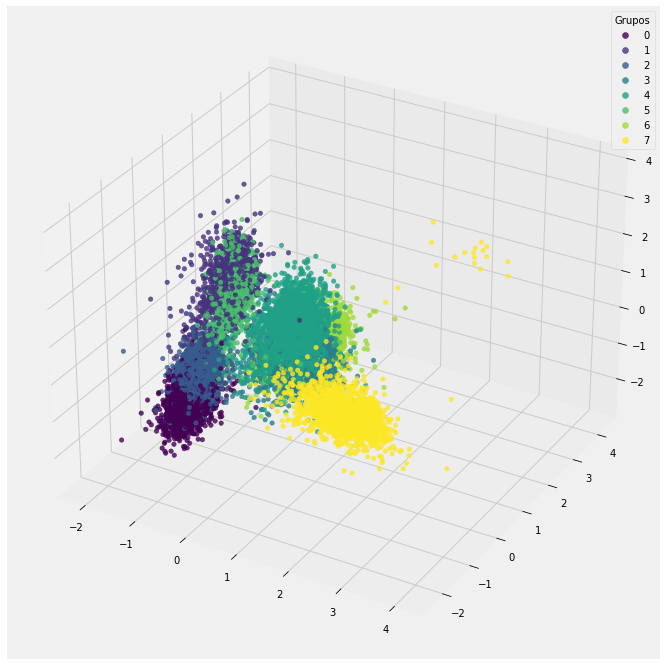

In [ ]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=cluster_labels)
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

## <span style="color:#4361EE">Visualización por T-SNE</span>

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3).fit_transform(scaled_pcs)
X_embedded.shape

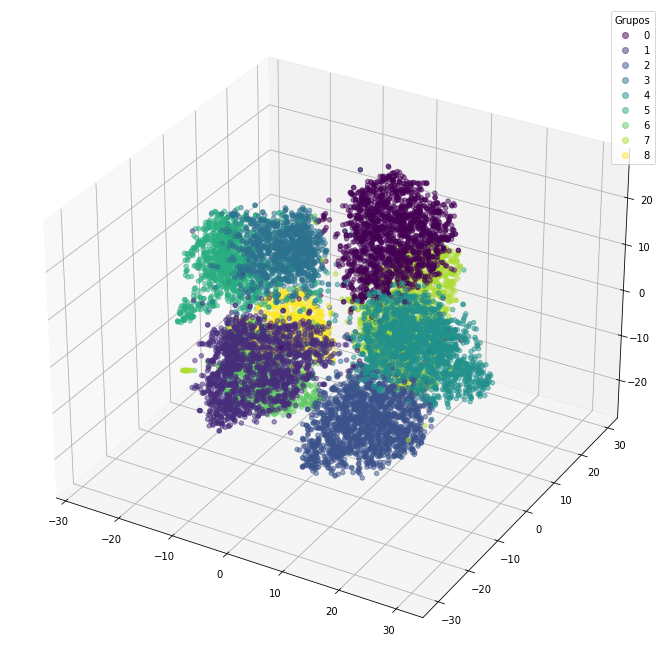

In [ ]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],alpha=0.5,c=cluster_labels)
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

In [ ]:
data_final = pd.DataFrame([datos['essay'].values, datos['corrected'].values,ftext_feature_array,pcs,X_embedded,cluster_labels['Grupo']]).T
data_final.columns = ['essay','corrected','Embedding_300','PCA_40','TSNE_3','Grupo']
data_final

,essay,corrected,Embedding_300,PCA_40,TSNE_3,Grupo
0,"Dear local newspaper, I think effects computer...","Dear local newspaper, I think effects computer...","[0.0295240741722193, 0.0686550713107768, 0.000...","[-0.3652411498228895, 0.0059020478556142545, -...","[3.452922, 14.09987, -2.1513095]",7
1,"Dear @CAPS1 @CAPS2, I believe that using compu...","Dear @CAPS1 @CAPS2, I believe that using compu...","[0.0394296800937461, 0.0803876249044263, 0.023...","[-0.3349730504404363, 0.02694684532587877, -0....","[-0.013135172, 16.675117, -11.130215]",7
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[0.0719695743072802, 0.0699181315154854, 0.013...","[-0.33814322312176537, 0.026676232124773325, -...","[4.8740635, 25.186968, -5.3799744]",7
3,"Dear Local Newspaper, @CAPS1 I have found that...","Dear Local Newspaper, @CAPS1 I have found that...","[0.0356469482496335, 0.0551342354551131, 0.051...","[-0.31963211015821164, 0.04940567193931952, -0...","[-1.7401366, 18.707659, -14.744502]",7
4,"Dear @LOCATION1, I know having computers has a...","Dear @LOCATION1, I know having computers has a...","[0.0399990115611972, 0.0547439935368673, 0.024...","[-0.3185485131183755, -0.006231793956220515, -...","[3.8301988, 15.191276, -12.973166]",7
...,...,...,...,...,...,...
12973,In most stories mothers and daughters are eit...,In most stories mothers and daughters are eit...,"[0.0629703543205074, 0.0576134067068328, 0.112...","[-0.18791681599631094, -0.06025016389992152, 0...","[-5.3823657, -1.5951165, 18.53066]",3
12974,I never understood the meaning laughter is th...,I never understood the meaning laughter is th...,"[0.0474616437147785, 0.0639348637391885, 0.098...","[-0.2001099219924499, -0.024213326143479482, 0...","[-4.6492243, -2.2744493, 19.172071]",3
12975,"When you laugh, is @CAPS5 out of habit, or is ...","When you laugh, is @CAPS5 out of habit, or is ...","[0.0536450611946197, 0.0475574552676411, 0.100...","[-0.1623757925513437, 0.06542237098554636, 0.1...","[-7.916717, -0.1390782, 17.360756]",3
12976,Trippin' on fen...,"Tripping' on fences I am @NUM1 years young, a...","[0.0486037977905425, 0.0604278634004003, 0.051...","[-0.16572868847620972, 0.016386070813859493, 0...","[-4.9053097, -8.226818, 14.885445]",3


In [ ]:
data_final.to_csv('../Datos/Ensayos/essay_corrected_embedding_300_PCA_40_TSNE.csv')

In [ ]:
data_final = pd.read_csv('../Datos/Ensayos/essay_corrected_embedding_300_PCA_40_grupo.csv',index_col=0)

## <span style="color:#4361EE">Ejemplos de Clusters </span>

In [ ]:
cluster = 0

ensayos = data_final[data_final['Grupo']==cluster]
ensayos

,essay,corrected,Embedding_300,PCA_40,TSNE_3,Grupo
1783,Certain materials being removed from libraries...,Certain materials being removed from libraries...,[ 8.95216940e-02 5.92817169e-02 8.04425017e-...,[-0.30598587 -0.08221176 -0.1393592 -0.126721...,[ 9.331747 6.5805964 -2.739645 ],0
1784,Write a persuasive essay to a newspaper reflec...,Write a persuasive essay to a newspaper reflec...,[ 3.89144775e-02 7.96284946e-02 -4.29549010e-...,[-0.43724501 -0.05042781 -0.14831774 0.010515...,[ 7.1607585 18.846262 0.9184058],0
1785,Do you think that libraries should remove cert...,Do you think that libraries should remove cert...,[ 0.05038937 0.05829172 0.00526158 -0.095681...,[-4.44300628e-01 1.06324571e-03 -1.60529298e-...,[-0.0672878 16.904844 2.857986 ],0
1786,"In @DATE1's world, there are many things found...","In @DATE1's world, there are many things found...",[ 7.14081658e-02 4.22674749e-02 3.28732145e-...,[-0.38271559 -0.02175564 -0.27802689 -0.102799...,[ 6.794983 16.526472 -0.69145644],0
1787,In life you have the 'offensive things'. The l...,"In life, you have the 'offensive things'. The ...",[ 0.04375537 0.06662852 -0.00047685 -0.086184...,[-0.36491925 0.01979739 -0.13108308 0.016524...,[5.7302547 6.3191667 5.827498 ],0
...,...,...,...,...,...,...
6009,I would have to say that the reason that the n...,I would have to say that the reason that the n...,[ 2.54344928e-02 7.34067000e-02 -1.18267442e-...,[-0.17151537 -0.18653827 -0.19943798 -0.033181...,[ 2.5250888 15.561867 6.846436 ],0
6313,Reserved need to check keenly,Reserved need to check keenly,[ 9.20403302e-02 1.19383624e-01 -3.75319694e-...,[-0.74772093 -0.12751152 -0.35986221 0.041613...,[-16.588829 2.6877868 -16.178596 ],0
6444,NO IMAGE,NO IMAGE,[-1.55899823e-01 -7.44088180e-03 4.31449823e-...,[ 0.33836122 0.69496975 -0.16056964 -0.043191...,[ 3.8920472 -12.260648 -21.483559 ],0
6572,The author ended the story with an unconcluded...,The author ended the story with an concluded e...,[ 0.04081171 0.04356724 0.06118793 -0.147971...,[-0.02170889 -0.19056144 -0.11463533 -0.086345...,[-2.1444387 14.351213 15.855663 ],0


In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")

In [ ]:
cluster = 2

ensayos = data_final[data_final['Grupo']==cluster]

for i in range(3):
    ensayo = ensayos.corrected.sample().values
    print(''.join(ensayo))
    print()
    traduccion = translator(''.join(ensayo))
    print(traduccion[0]['translation_text'])    
    print()

By ending the story with the idea of retaking a test in the spring, the author sets a feeling of starting fresh and persevering. For example, when the author says” when the snow melts and the geese return and the hibiscus is budding, ” she shows the idea of starting a fresh new life in the spring by returning to their home and the hibiscus is starting fresh by budding again. This is why spring is when sang wants to start fresh and retake the test. The paragraph also shows that sang, like the hibiscus, is persevering. The hibiscus is persevering by making it through the winter and blooming again while sang is persevering by retaking the test. The author ends with this paragraph to show that sang is not going to give up. 

Al terminar la historia con la idea de volver a hacer una prueba en primavera, la autora se siente fresca y perseverante. Por ejemplo, cuando el autor dice "cuando la nieve se derrite y los gansos regresan y el hibisco está en ciernes", muestra la idea de comenzar una 

## <span style="color:#4361EE">Tópicos Originales</span>

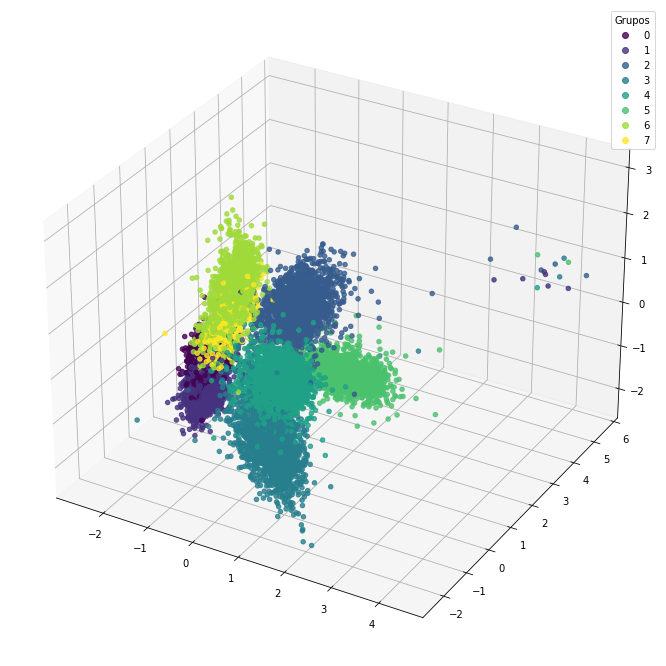

In [ ]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=datos['essay_set'])
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

## <span style="color:#4361EE">Visualización por T-SNE (Tópicos Originales)</span>

In [ ]:
from sklearn.manifold import TSNE
X_embedded_2 = TSNE(n_components=3).fit_transform(scaled_pcs)
X_embedded_2.shape

(12978, 3)

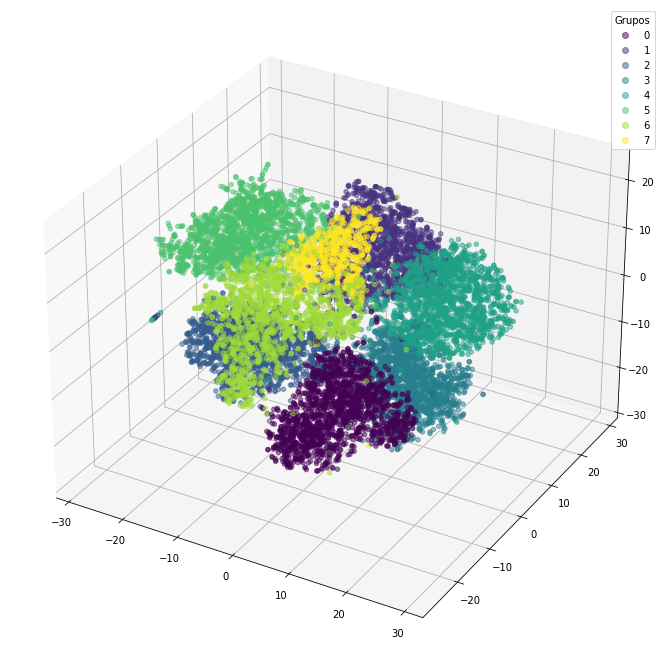

In [ ]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(X_embedded_2[:,0],X_embedded_2[:,1],X_embedded_2[:,2],alpha=0.5,c=datos['essay_set'])
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

## <span style="color:#4361EE">Tópicos Originales vs clustering</span>

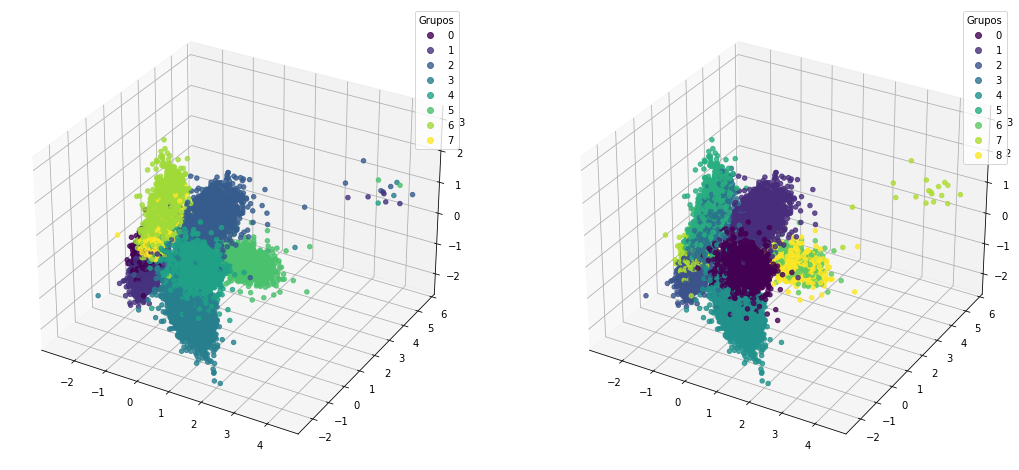

In [ ]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=datos['essay_set'])
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=cluster_labels)
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

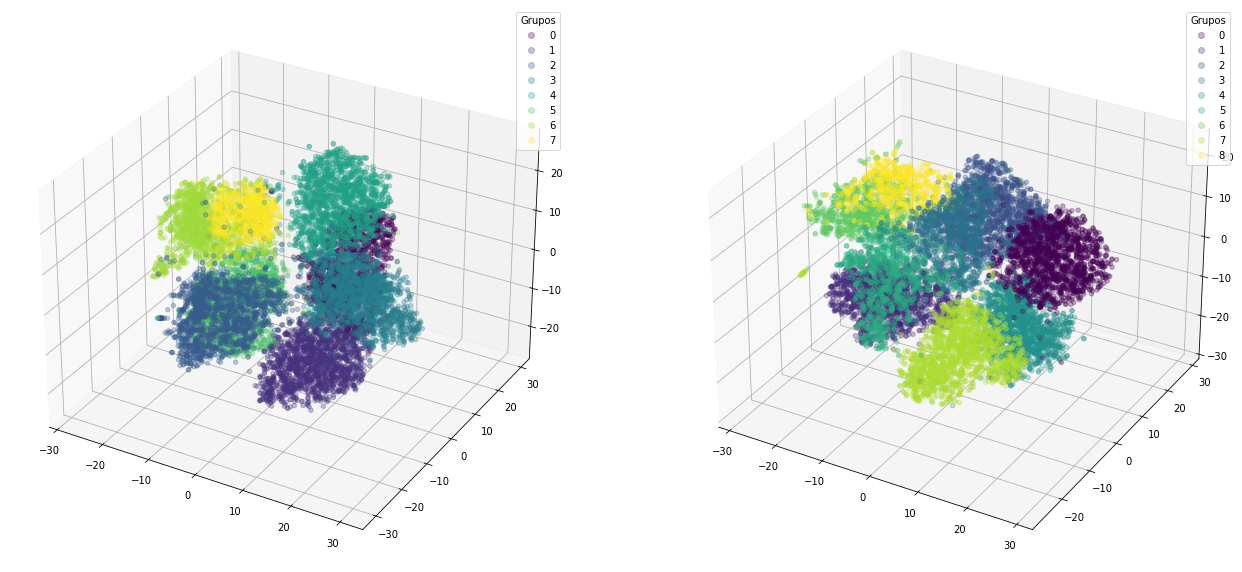

In [ ]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter3D(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],alpha=0.3,c=datos['essay_set'])
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")

ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter3D(X_embedded_2[:,0],X_embedded_2[:,1],X_embedded_2[:,2],alpha=0.3,c=cluster_labels)
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

[[Volver]](#Contenido)

## <span style="color:#4361EE">Aprendizaje Supervisado</span>

In [ ]:
# Motor de Inteligencia Artificial
import tensorflow as tf
# Manejo de arreglos
import numpy as np
# Chequear Versión de tensorflow
print("tensorflow version:",tf.__version__)

tensorflow version: 2.5.0


In [ ]:
import pandas as pd

In [ ]:
embedding = pd.read_csv('../Datos/Ensayos/Doc_Embedding_300.csv',index_col=0)
embedding_vector_length = embedding.shape[1]
embedding

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.134276,-0.064131,-0.203344,-0.030151,0.040111,0.145260,-0.101368,-0.012593,-0.032670,0.108168,...,-0.144870,-0.145255,0.145434,0.136225,-0.009014,-0.080278,-0.041781,-0.031611,-0.020657,0.100653
1,-0.147792,-0.054068,-0.208092,-0.020247,0.058164,0.164993,-0.123446,-0.045614,-0.023216,0.098593,...,-0.116557,-0.101918,0.136425,0.139821,0.027870,-0.037178,-0.030455,-0.014172,-0.023276,0.087490
2,-0.162725,-0.070710,-0.234945,-0.051971,0.069461,0.165659,-0.123119,-0.069889,-0.074690,0.130028,...,-0.115945,-0.101869,0.172404,0.127285,-0.004383,-0.058549,-0.024826,-0.041188,-0.041705,0.114225
3,-0.140655,-0.066135,-0.206973,-0.041915,0.048141,0.177473,-0.110381,-0.043059,-0.028374,0.119578,...,-0.107149,-0.093143,0.149249,0.147888,0.000796,-0.042721,-0.002731,-0.028933,-0.046156,0.082511
4,-0.150969,-0.083469,-0.208581,-0.039027,0.054728,0.177736,-0.133557,-0.036243,-0.049799,0.118103,...,-0.118250,-0.124038,0.132092,0.137708,0.014891,-0.059917,-0.030523,-0.013634,-0.001344,0.078147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,-0.139110,-0.077281,-0.213818,-0.011500,0.059958,0.156127,-0.120783,0.004550,-0.036014,0.092854,...,-0.047728,-0.083366,0.130650,0.129506,0.006148,-0.022952,-0.067542,0.000395,-0.070913,0.053382
12974,-0.145930,-0.079537,-0.195362,-0.001226,0.067940,0.126856,-0.135155,-0.010318,-0.019352,0.069839,...,-0.066038,-0.095420,0.122467,0.145113,0.031238,-0.034937,-0.108001,0.012400,-0.065976,0.058821
12975,-0.139951,-0.090990,-0.192339,-0.019373,0.061235,0.171053,-0.117083,0.001641,-0.041339,0.077918,...,-0.048877,-0.080973,0.122421,0.136537,-0.002838,-0.014957,-0.095449,-0.003224,-0.040702,0.052954
12976,-0.139579,-0.073543,-0.208965,-0.003995,0.058935,0.148765,-0.108328,0.041651,-0.028309,0.080124,...,-0.051497,-0.094730,0.130091,0.196058,0.004729,-0.003022,-0.133983,0.006020,-0.058116,0.054341


## <span style="color:#4361EE">Rangos del Embedding </span>

In [ ]:
embedding.min().min()

-0.6963141580874269

In [ ]:
embedding.max().max()

0.9985762791974204

In [ ]:
features = datos.select_dtypes(include='number').iloc[:,2:]
features

,target_score,corrections,similarity,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,0.8,15,0.973035,395,180,206,16,2,18,3,...,19,48,56,14,19,20,6,0,16,2
1,0.9,23,0.979935,456,210,238,21,12,15,3,...,23,42,73,19,26,37,5,5,10,0
2,0.7,16,0.989641,306,160,155,16,5,13,0,...,18,22,47,16,14,28,3,3,10,1
3,1.0,32,0.981397,576,266,330,31,14,14,1,...,40,28,81,17,28,45,37,0,23,0
4,0.8,19,0.978967,518,213,252,30,7,15,0,...,28,34,73,16,39,57,4,4,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,3.5,28,0.954823,953,349,450,39,26,61,0,...,56,135,142,55,74,69,17,14,24,3
12974,3.2,47,0.955488,635,226,314,43,19,24,10,...,37,76,79,25,58,53,18,4,17,3
12975,4.0,24,0.959167,955,380,513,48,35,48,7,...,41,85,126,39,58,96,38,5,21,2
12976,4.0,13,0.942394,666,258,355,40,20,41,2,...,43,95,79,22,59,50,13,4,10,1


In [ ]:
features.columns

Index(['target_score', 'corrections', 'similarity', 'token_count',
       'unique_token_count', 'nostop_count', 'sent_count', 'ner_count',
       'comma', 'question', 'exclamation', 'quotation', 'organization', 'caps',
       'person', 'location', 'money', 'time', 'date', 'percent', 'noun', 'adj',
       'pron', 'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'part', 'intj'],
      dtype='object')

In [ ]:
#target = features_st_norm['standard_score']
target = features['target_score']
target

0        0.8
1        0.9
2        0.7
3        1.0
4        0.8
        ... 
12973    3.5
12974    3.2
12975    4.0
12976    4.0
12977    4.0
Name: target_score, Length: 12978, dtype: float64

In [ ]:
features = features.iloc[:,1:]
features

,corrections,similarity,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,exclamation,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,15,0.973035,395,180,206,16,2,18,3,4,...,19,48,56,14,19,20,6,0,16,2
1,23,0.979935,456,210,238,21,12,15,3,1,...,23,42,73,19,26,37,5,5,10,0
2,16,0.989641,306,160,155,16,5,13,0,0,...,18,22,47,16,14,28,3,3,10,1
3,32,0.981397,576,266,330,31,14,14,1,2,...,40,28,81,17,28,45,37,0,23,0
4,19,0.978967,518,213,252,30,7,15,0,0,...,28,34,73,16,39,57,4,4,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,28,0.954823,953,349,450,39,26,61,0,0,...,56,135,142,55,74,69,17,14,24,3
12974,47,0.955488,635,226,314,43,19,24,10,0,...,37,76,79,25,58,53,18,4,17,3
12975,24,0.959167,955,380,513,48,35,48,7,9,...,41,85,126,39,58,96,38,5,21,2
12976,13,0.942394,666,258,355,40,20,41,2,0,...,43,95,79,22,59,50,13,4,10,1


## <span style="color:#4361EE">Preparación de Datos </span>

In [ ]:
valid = pd.read_excel('../Datos/Ensayos/valid_set.xls')
valid

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,NaN
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,NaN
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,NaN
...,...,...,...,...,...
4213,21933,8,Have you ever noticed that if two little kids...,24933,NaN
4214,21934,8,Laughter @CAPS1 I ...,24934,NaN
4215,21935,8,Laughter in @CAPS1 A laugh is not just an act...,24935,NaN
4216,21937,8,LAUGHTER @CAPS1 i was younger my friend live...,24937,NaN


In [ ]:
test = pd.read_csv('../Datos/Ensayos/test_set.tsv',sep='\t', encoding = "ISO-8859-1")
test

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN
...,...,...,...,...,...
4249,22238,8,Just One @CAPS1 @CAPS2 can bring people togeth...,25238,NaN
4250,22239,8,@CAPS8 Was my first time going to the band ca...,25239,NaN
4251,22240,8,Laughter is one of the most important things i...,25240,NaN
4252,22241,8,A @CAPS1 Of @C...,25241,NaN


## <span style="color:#4361EE">Muestreo Estratificado</span>

In [ ]:
datos.columns

Index(['essay_id', 'topic', 'essay_text', 'target_score', 'tokens',
       'corrections', 'similarity', 'token_count', 'unique_token_count',
       'nostop_count', 'sent_count', 'ner_count', 'comma', 'question',
       'exclamation', 'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent', 'noun', 'adj', 'pron',
       'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'part', 'intj'],
      dtype='object')

In [ ]:
conteo = datos.groupby('topic')[['topic']].count()
conteo

,topic
topic,
1,1783
2,1800
3,1726
4,1772
5,1805
6,1800
7,1569
8,723


In [ ]:
# Muestras para validación
muestra = np.round(conteo*0.1,decimals=0).astype(int)
muestra

,topic
topic,
1,178
2,180
3,173
4,177
5,180
6,180
7,157
8,72


In [ ]:
# Función de Muestreo Estratificado
def strat(df,label,groups):
    
    strat = pd.DataFrame([])
    
    for i,cat in enumerate(sorted(df[f'{label}'].unique())):
        df_cal = df[df[f'{label}']==cat]
        muestra = df_cal.sample(groups[i],random_state=22)
        strat = pd.concat([strat,muestra])
    return strat

## <span style="color:#4361EE">Datos Test </span>

In [ ]:
data_test = strat(datos,'topic',muestra['topic'].values)
data_test

,essay_id,topic,essay_text,target_score,tokens,corrections,similarity,token_count,unique_token_count,nostop_count,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
829,832,1,"Dear editor, computers are good for people bec...",0.2,"[Dear, editor, ,, computers, are, good, for, p...",1,0.959819,22,20,12,...,3,2,2,2,1,0,0,0,0,0
1366,1371,1,"Dear Local Newspaper, I feel that negative eff...",1.2,"[Dear, Local, Newspaper, ,, I, feel, that, neg...",31,0.977788,602,264,326,...,43,49,79,25,36,44,23,0,11,2
329,331,1,"Dear @CAPS1, A recent study by scientists show...",1.0,"[Dear, @CAPS1, ,, A, recent, study, by, scient...",8,0.980878,545,252,272,...,29,59,83,21,36,44,4,2,18,0
1278,1283,1,"Dear @CAPS1, In a recent poll it was determine...",1.0,"[Dear, @CAPS1, ,, In, a, recent, poll, it, was...",8,0.985302,401,201,228,...,19,33,56,17,22,30,8,1,8,0
1102,1105,1,"Dear editor, @TIME1 week, I noticed an article...",0.9,"[Dear, editor, ,, @TIME1, week, ,, I, noticed,...",15,0.979755,443,191,248,...,27,53,57,16,25,24,6,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744,21327,8,I was in @NUM1 grade; when it was almost the ...,3.3,"[ , I, was, in, @NUM1, grade, ;, when, it, wa...",18,0.932475,528,208,204,...,26,102,73,27,32,37,4,4,8,5
12825,21433,8,A @CAPS1 @CAPS2 The @CAPS3 @CAPS4 was a warm ...,3.5,"[ , A, @CAPS1, @CAPS2, The, @CAPS3, @CAPS4, wa...",22,0.948106,864,326,453,...,50,83,123,25,65,97,44,5,20,2
12271,20736,8,“Laughter” A good relationship is built on tr...,4.5,"[ , "", Laughter, "", A, good, rel...",25,0.949564,812,323,420,...,62,114,117,28,57,50,22,8,23,2
12738,21319,8,The snow shimmered in the sunlight like sequi...,4.6,"[ , The, snow, shimmered, in, the, sunlight, l...",11,0.920155,841,376,495,...,52,114,118,21,33,85,10,2,16,0


In [ ]:
# Sacar Validation y training
data_train = datos.loc[np.setdiff1d(datos.index,data_test.index)]
data_train

,essay_id,topic,essay_text,target_score,tokens,corrections,similarity,token_count,unique_token_count,nostop_count,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,1,1,"Dear local newspaper, I think effects computer...",0.8,"[Dear, local, newspaper, ,, I, think, effects,...",15,0.973035,395,180,206,...,19,48,56,14,19,20,6,0,16,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.9,"[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",23,0.979935,456,210,238,...,23,42,73,19,26,37,5,5,10,0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.7,"[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",16,0.989641,306,160,155,...,18,22,47,16,14,28,3,3,10,1
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",1.0,"[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...",32,0.981397,576,266,330,...,40,28,81,17,28,45,37,0,23,0
4,5,1,"Dear @LOCATION1, I know having computers has a...",0.8,"[Dear, @LOCATION1, ,, I, know, having, compute...",19,0.978967,518,213,252,...,28,34,73,16,39,57,4,4,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,3.5,"[ , In, most, stories, mothers, and, daughters...",28,0.954823,953,349,450,...,56,135,142,55,74,69,17,14,24,3
12974,21628,8,I never understood the meaning laughter is th...,3.2,"[ , I, never, understood, the, meaning, laught...",47,0.955488,635,226,314,...,37,76,79,25,58,53,18,4,17,3
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",4.0,"[When, you, laugh, ,, is, @CAPS5, out, of, hab...",24,0.959167,955,380,513,...,41,85,126,39,58,96,38,5,21,2
12976,21630,8,"Tripping' on fences I am @NUM1 years young, a...",4.0,"[ , Trippin, ', ...",13,0.942394,666,258,355,...,43,95,79,22,59,50,13,4,10,1


In [ ]:
embedding_train = embedding.iloc[data_train.index]
embedding_test = embedding.iloc[data_test.index]
print(embedding_train.shape)
print(embedding_test.shape)

(11681, 300)
(1297, 300)


In [ ]:
features_train = features.iloc[data_train.index]
features_test = features.iloc[data_test.index]
print(features_train.shape)
print(features_test.shape)

(11681, 30)
(1297, 30)


In [ ]:
target_train = target.iloc[data_train.index]
target_test = target.iloc[data_test.index]

## <span style="color:#4361EE">Cambio de Escalas</span>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1.0,1.0))

features_train_scaled = pd.DataFrame(scaler.fit_transform(features_train))
features_test_scaled = pd.DataFrame(scaler.fit_transform(features_test))
#target_train_scaled = scaler.fit_transform(target_train.values.reshape(-1,1))
#target_test_scaled = scaler.fit_transform(target_test.values.reshape(-1,1))
features_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.769231,0.881053,-0.369687,-0.292247,-0.447154,-0.772727,-0.931034,-0.513514,-0.956522,-0.703704,...,-0.591398,-0.533981,-0.416667,-0.600000,-0.654545,-0.687500,-0.842105,-1.000000,-0.466667,-0.90
1,-0.646154,0.918065,-0.271852,-0.172962,-0.360434,-0.696970,-0.586207,-0.594595,-0.956522,-0.925926,...,-0.505376,-0.592233,-0.239583,-0.457143,-0.527273,-0.421875,-0.868421,-0.545455,-0.666667,-1.00
2,-0.753846,0.970130,-0.512430,-0.371769,-0.585366,-0.772727,-0.827586,-0.648649,-1.000000,-1.000000,...,-0.612903,-0.786408,-0.510417,-0.542857,-0.745455,-0.562500,-0.921053,-0.727273,-0.666667,-0.95
3,-0.507692,0.925908,-0.079391,0.049702,-0.111111,-0.545455,-0.517241,-0.621622,-0.985507,-0.851852,...,-0.139785,-0.728155,-0.156250,-0.514286,-0.490909,-0.296875,-0.026316,-1.000000,-0.233333,-1.00
4,-0.707692,0.912872,-0.172414,-0.161034,-0.322493,-0.560606,-0.758621,-0.594595,-1.000000,-1.000000,...,-0.397849,-0.669903,-0.239583,-0.542857,-0.290909,-0.109375,-0.894737,-0.636364,-0.400000,-0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,-0.569231,0.783361,0.525261,0.379722,0.214092,-0.424242,-0.103448,0.648649,-1.000000,-1.000000,...,0.204301,0.310680,0.479167,0.571429,0.345455,0.078125,-0.552632,0.272727,-0.200000,-0.85
11677,-0.276923,0.786927,0.015237,-0.109344,-0.154472,-0.363636,-0.344828,-0.351351,-0.855072,-1.000000,...,-0.204301,-0.262136,-0.177083,-0.285714,0.054545,-0.171875,-0.526316,-0.636364,-0.433333,-0.85
11678,-0.630769,0.806660,0.528468,0.502982,0.384824,-0.287879,0.206897,0.297297,-0.898551,-0.333333,...,-0.118280,-0.174757,0.312500,0.114286,0.054545,0.500000,0.000000,-0.545455,-0.300000,-0.90
11679,-0.800000,0.716687,0.064956,0.017893,-0.043360,-0.409091,-0.310345,0.108108,-0.971014,-1.000000,...,-0.075269,-0.077670,-0.177083,-0.371429,0.072727,-0.218750,-0.657895,-0.636364,-0.666667,-0.95


## <span style="color:#4361EE">Primer Modelo </span>

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features.shape[1]-1,),name='Input_Features')

#x = Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2),name='LSTM')(x1)
x = Concatenate(name='Concatenar')([x1,x2])
#x = Dropout(0.2)(x2)
#x = Dense(128,activation='elu',name='Capa_Densa')(x)
x = Dropout(0.2)(x)
x = Dense(16,activation='elu',name='Capa_Densa_1')(x)
x = Dropout(0.2)(x)
x = Dense(8,activation='elu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='elu',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae'])

model.summary()

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Embedding (InputLayer)    [(None, 300)]        0                                            
__________________________________________________________________________________________________
Input_Features (InputLayer)     [(None, 30)]         0                                            
__________________________________________________________________________________________________
Concatenar (Concatenate)        (None, 330)          0           Input_Embedding[0][0]            
                                                                 Input_Features[0][0]             
__________________________________________________________________________________________________
dropout_35 (Dropout)            (None, 330)          0           Concatenar[0][0]          

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
history = model.fit(x = [embedding_train,features_train_scaled],
                    y = target_train,
                    validation_data = ([embedding_test,features_test_scaled],target_test),
                    epochs=100,
                    batch_size=32,verbose=1)

Epoch 1/100
366/366 [==============================] - 2s 4ms/step - loss: 0.5129 - mae: 0.4874 - val_loss: 0.1688 - val_mae: 0.2788
Epoch 2/100
366/366 [==============================] - 1s 4ms/step - loss: 0.2929 - mae: 0.3817 - val_loss: 0.1400 - val_mae: 0.2466
Epoch 3/100
366/366 [==============================] - 1s 3ms/step - loss: 0.2642 - mae: 0.3594 - val_loss: 0.1283 - val_mae: 0.2386
Epoch 4/100
366/366 [==============================] - 1s 4ms/step - loss: 0.2504 - mae: 0.3507 - val_loss: 0.1377 - val_mae: 0.2624
Epoch 5/100
366/366 [==============================] - 1s 4ms/step - loss: 0.2278 - mae: 0.3348 - val_loss: 0.1137 - val_mae: 0.2280
Epoch 6/100
366/366 [==============================] - 1s 4ms/step - loss: 0.2126 - mae: 0.3264 - val_loss: 0.1028 - val_mae: 0.2066
Epoch 7/100
366/366 [==============================] - 1s 3ms/step - loss: 0.1983 - mae: 0.3155 - val_loss: 0.1020 - val_mae: 0.2113
Epoch 8/100
366/366 [==============================] - 2s 4ms/step - 

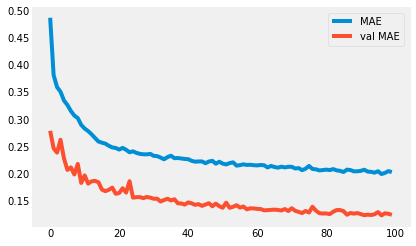

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.show()

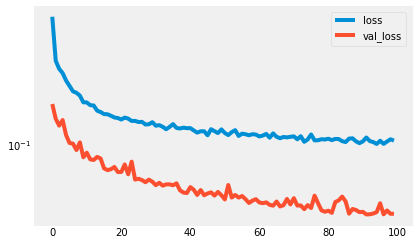

In [ ]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
y_pred = model.predict([embedding_train,features_train_scaled])
y_true = target_train
y_pred.shape

(11681, 1)

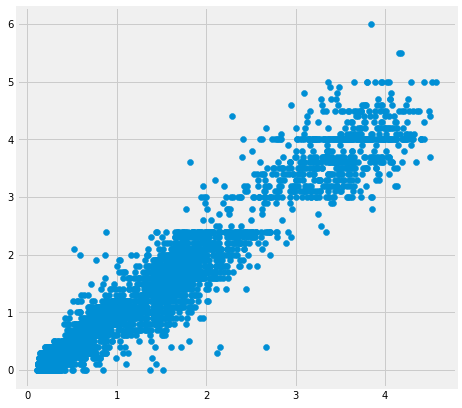

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.show()

In [ ]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.97341887],
       [0.97341887, 1.        ]])

In [ ]:
y_pred = model.predict([embedding_test,features_test_scaled])
y_true = target_test
y_pred.shape

(1297, 1)

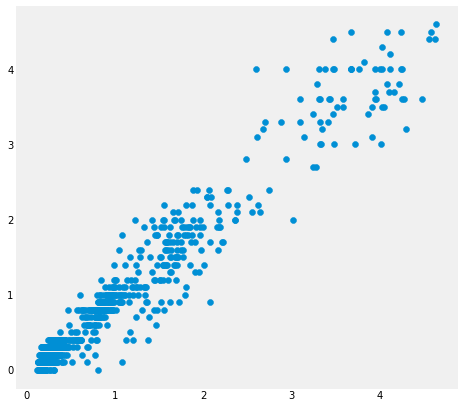

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.grid()
plt.show()

In [ ]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.97422973],
       [0.97422973, 1.        ]])

## <span style="color:#4361EE">Segundo Modelo</span>

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features.shape[1]-1,),name='Input_Features')

#x = Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2),name='LSTM')(x1)
#x = Concatenate(name='Concatenar')([x1,x2])
x = Dropout(0.2)(x1)
x = Dense(64,activation='elu',name='Capa_Densa_1')(x)
x = Dropout(0.2)(x)
#
x = Dense(32,activation='relu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='relu',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae'])

model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Embedding (InputLayer)    [(None, 300)]        0                                            
__________________________________________________________________________________________________
dropout_38 (Dropout)            (None, 300)          0           Input_Embedding[0][0]            
__________________________________________________________________________________________________
Capa_Densa_1 (Dense)            (None, 64)           19264       dropout_38[0][0]                 
__________________________________________________________________________________________________
dropout_39 (Dropout)            (None, 64)           0           Capa_Densa_1[0][0]               
___________________________________________________________________________________________

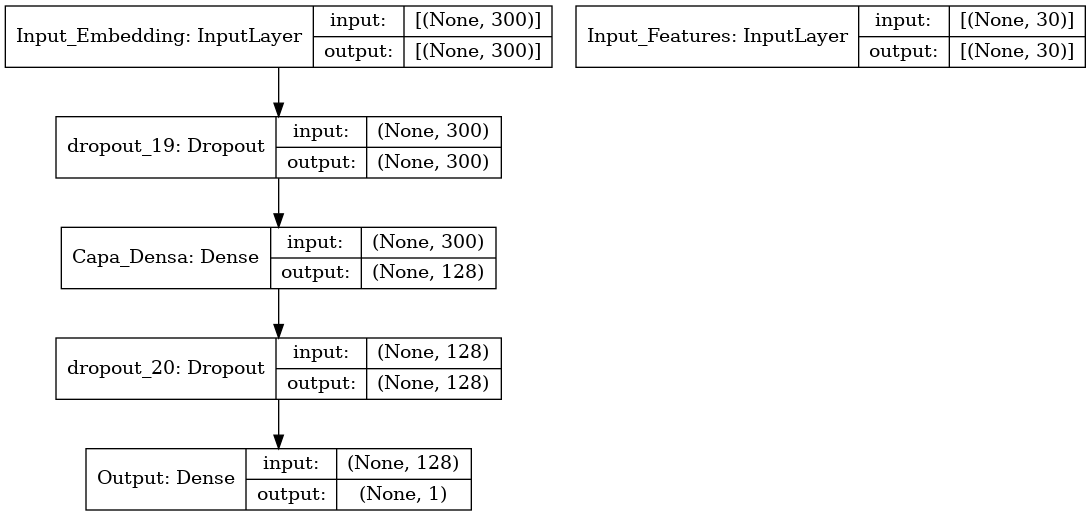

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [ ]:
history = model.fit(x = [embedding_train,features_train_scaled],
                    y = target_train,
                    validation_data = ([embedding_test,features_test_scaled],target_test),
                    epochs=100,
                    batch_size=32,verbose=1)

Epoch 1/100
366/366 [==============================] - 2s 5ms/step - loss: 0.3800 - mae: 0.3751 - val_loss: 0.1685 - val_mae: 0.2465
Epoch 2/100
366/366 [==============================] - 1s 3ms/step - loss: 0.2195 - mae: 0.2671 - val_loss: 0.1137 - val_mae: 0.1926
Epoch 3/100
366/366 [==============================] - 1s 4ms/step - loss: 0.1798 - mae: 0.2406 - val_loss: 0.1131 - val_mae: 0.1946
Epoch 4/100
366/366 [==============================] - 2s 4ms/step - loss: 0.1685 - mae: 0.2299 - val_loss: 0.1063 - val_mae: 0.1781
Epoch 5/100
366/366 [==============================] - 1s 4ms/step - loss: 0.1622 - mae: 0.2245 - val_loss: 0.0711 - val_mae: 0.1565
Epoch 6/100
366/366 [==============================] - 1s 4ms/step - loss: 0.1516 - mae: 0.2150 - val_loss: 0.0861 - val_mae: 0.1697
Epoch 7/100
366/366 [==============================] - 1s 4ms/step - loss: 0.1448 - mae: 0.2128 - val_loss: 0.0930 - val_mae: 0.1652
Epoch 8/100
366/366 [==============================] - 1s 4ms/step - 

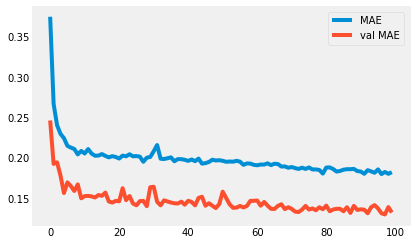

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.show()

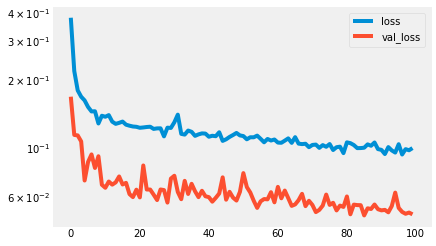

In [ ]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
y_pred = model.predict([embedding_train,features_train_scaled])
y_true = target_train
y_pred.shape

(11681, 1)

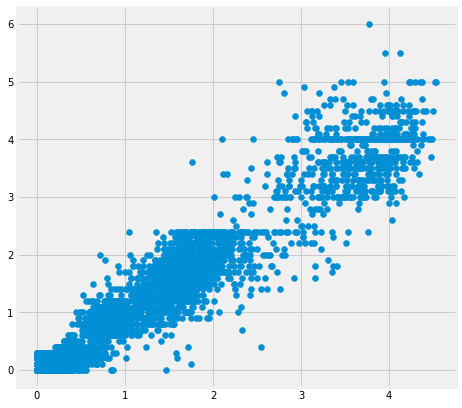

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.show()

In [ ]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.97017016],
       [0.97017016, 1.        ]])

In [ ]:
y_pred = model.predict([embedding_test,features_test_scaled])
y_true = target_test
y_pred.shape

(1297, 1)

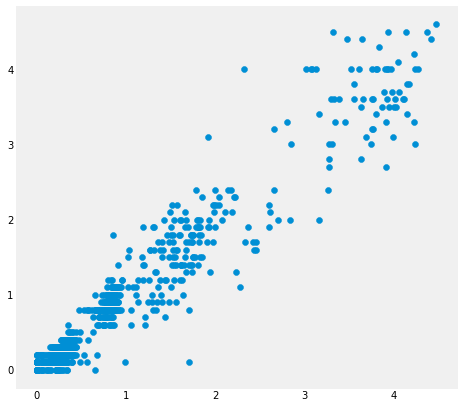

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.grid()
plt.show()

In [ ]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.96826479],
       [0.96826479, 1.        ]])

## <span style="color:#4361EE">Tercer Modelo </span>

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features.shape[1]-1,),name='Input_Features')

x = Concatenate(name='Concatenar')([x1,x2])
x = Dropout(0.2)(x)
x = Dense(128,activation='relu',name='Capa_Densa_1')(x)
x = Dropout(0.2)(x)
x = Dense(64,activation='relu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(32,activation='relu',name='Capa_Densa_3')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='relu',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae'])

model.summary()

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Embedding (InputLayer)    [(None, 300)]        0                                            
__________________________________________________________________________________________________
Input_Features (InputLayer)     [(None, 30)]         0                                            
__________________________________________________________________________________________________
Concatenar (Concatenate)        (None, 330)          0           Input_Embedding[0][0]            
                                                                 Input_Features[0][0]             
__________________________________________________________________________________________________
dropout_52 (Dropout)            (None, 330)          0           Concatenar[0][0]          

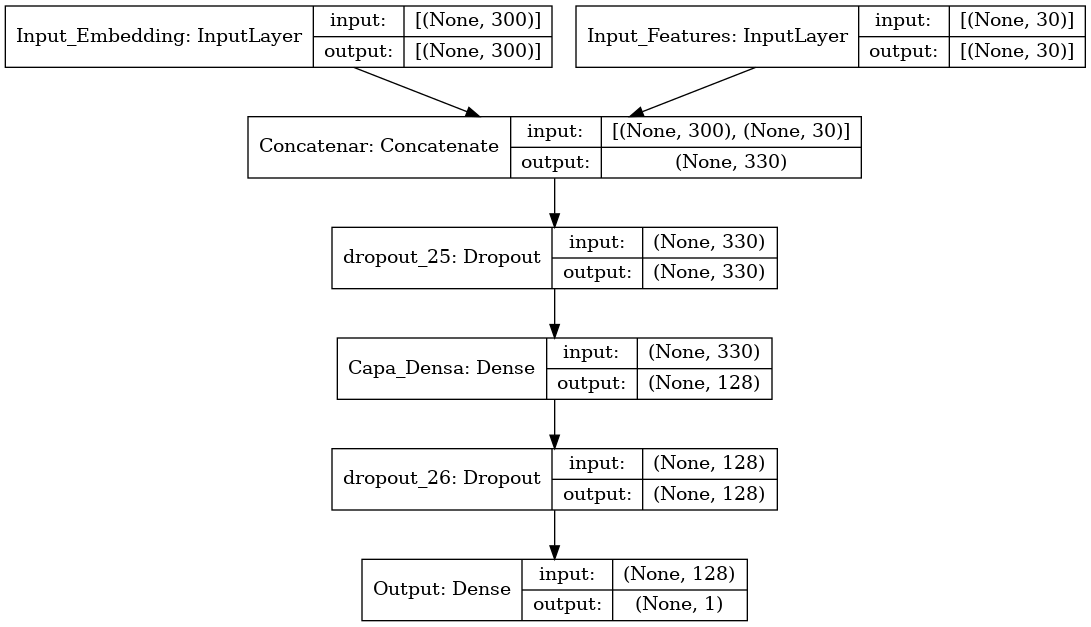

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [ ]:
history = model.fit(x = [embedding_train,features_train_scaled],
                    y = target_train,
                    validation_data = ([embedding_test,features_test_scaled],target_test),
                    epochs=200,
                    batch_size=32,verbose=1)

Epoch 1/200
366/366 [==============================] - 3s 5ms/step - loss: 0.2987 - mae: 0.3233 - val_loss: 0.1010 - val_mae: 0.1968
Epoch 2/200
366/366 [==============================] - 2s 5ms/step - loss: 0.1763 - mae: 0.2437 - val_loss: 0.0630 - val_mae: 0.1571
Epoch 3/200
366/366 [==============================] - 2s 5ms/step - loss: 0.1342 - mae: 0.2103 - val_loss: 0.0720 - val_mae: 0.1699
Epoch 4/200
366/366 [==============================] - 2s 5ms/step - loss: 0.1137 - mae: 0.1922 - val_loss: 0.0561 - val_mae: 0.1440
Epoch 5/200
366/366 [==============================] - 2s 5ms/step - loss: 0.0986 - mae: 0.1784 - val_loss: 0.0381 - val_mae: 0.1239
Epoch 6/200
366/366 [==============================] - 2s 5ms/step - loss: 0.0983 - mae: 0.1766 - val_loss: 0.0467 - val_mae: 0.1315
Epoch 7/200
366/366 [==============================] - 2s 5ms/step - loss: 0.0840 - mae: 0.1659 - val_loss: 0.0353 - val_mae: 0.1176
Epoch 8/200
366/366 [==============================] - 2s 5ms/step - 

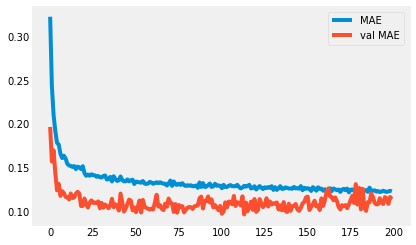

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.show()

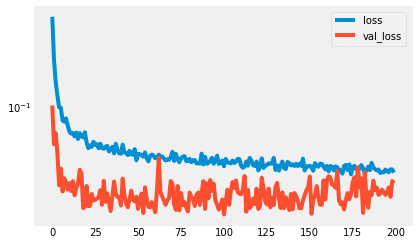

In [ ]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
y_pred = model.predict([embedding_train,features_train_scaled])
y_true = target_train
y_pred.shape

(11681, 1)

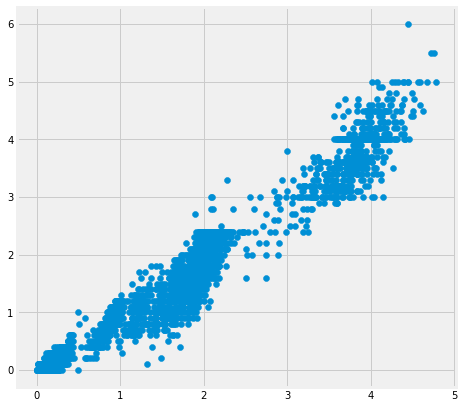

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.show()

In [ ]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.98393789],
       [0.98393789, 1.        ]])

In [ ]:
y_pred = model.predict([embedding_test,features_test_scaled])
y_true = target_test
y_pred.shape

(1297, 1)

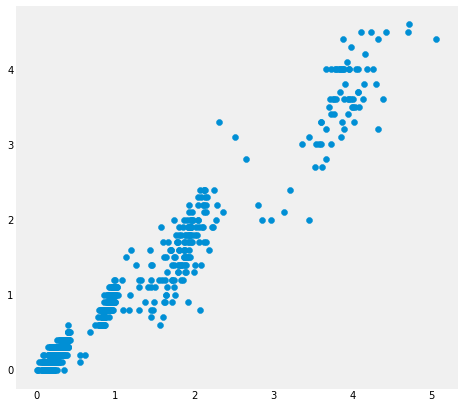

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.grid()
plt.show()

In [ ]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.98162054],
       [0.98162054, 1.        ]])